# Project Navigation Guidelines

In [ ]:
'''
===================================================
Notebook naming convention for FindMeInside (FMI)
===================================================
Notebook name: [FMI] <Coord/Label> Alg - Exp<experiment_number>, Trial<trial_number>

===================================================
Folder/File naming convention
===================================================
# Folder categorised by Experiment (except Testing folder)
Folder name: Experiment<Experiment_number>

# Each Folder has N files.
# A file is either a 1)Unprocessed Dataset, 2)Processed Dataset, 3)Results dataset, 4) Notebook file
# Each experiment has N trials. (Adjustments to parameters/algorithm are made in each trial)
Files in folder will be named accordingly...

- Raw data point:             E<experiment_number>_Label/Location<location_identifier>_<date>v<version_number>
-- e.g. E1_LabelA_230320v1
- Raw data collection:        E<experiment_number>_All_Raw_<date>v<version_number>
-- e.g. E1_All_Raw_230320v1
- Processed data (if any):    E<experiment_number>_All_Proc_<date>v<version_number>
-- e.g. E1_All_Proc_230320v1
- Resampled data (if any):    E<experiment_number>_resampled_t<trial_number>
-- e.g. E1_resampled_t1
- Results data:               E<experiment_number>_<algorithm>_t<trial_number>_k<number_of_neighbours>
-- e.g. E1_KNN_t1_k37

===================================================
List of experiment(s) & description(s)
===================================================
>> Experiment 1 (Exp1) :11 Sensors {1, ..., 11} , 4 Location Labels {A,B,C,D}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 2 (Exp2) :11 Sensors {1, ..., 11} , 4 Location Coords {(x_A, y_A), ... (x_D, y_D)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 3 (Exp3) : 12 Sensors {0x1, ..., 0xC} , 12 Location Label {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 4 (Exp4) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 5 (Exp5) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Averaged 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 6 (Exp6) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Resampled 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 7 (Exp7) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Label Coords (Label Model)

>> Experiment 8 (Exp8) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Sampled 12-Sensor RSSI Signature for 12 Locations (100-x%)
>> Tested Data: Sampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

'''
None

# Trial Description

In [1]:
exp = 9
trial = "1"
'''
Trial 1
Algorithms use calcLocation mechanic
Resampling done within time period of 2s.
Distance weighting : 1/ (distance^2)
Validation test using data from locations outside of 12 sensor locations
Includes location (22, 13) - out of defined testbed area

'''
None

# Core Libraries

In [2]:
import pandas as pd #from pandas import read_csv, pivot_table
import numpy as np
import math
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# [Exploratory Data Analysis]

# Load Raw Train Dataset

In [4]:
# Read csv file into dataframe.
csvfile = pd.read_csv('E4copy_All_Proc_230320v1.csv')
relDf = pd.DataFrame(csvfile)
# print(relDf)
relDf.columns = relDf.columns.str.strip() #strip unintended whitespaces

# print("Columns: ", relDf.columns)
relDf = relDf[['Date','Time', 'ID2', 'RSSI', 'Location']] #select relevant columns
# df = df.drop(columns=['Type', 'ID0', 'ID1', 'Sensor Data', 'Temperature', 'Humidity', 'Raw Data'])
print(relDf)

          Date       Time      ID2  RSSI Location
0      16/3/20   15:14:49   0x0001   192      1,1
1      16/3/20   15:14:49   0x0003   177      1,1
2      16/3/20   15:14:49   0x0004   179      1,1
3      16/3/20   15:14:50   0x0002   189      1,1
4      16/3/20   15:14:51   0x0008   177      1,1
...        ...        ...      ...   ...      ...
52882  19/3/20   15:48:51   0x0009   177    19,13
52883  19/3/20   15:48:51   0x0004   177    19,13
52884  19/3/20   15:48:51   0x0002   177    19,13
52885  19/3/20   15:48:51   0x000B   189    19,13
52886  19/3/20   15:48:51   0x0005   177    19,13

[52887 rows x 5 columns]


# Resample/Reshape Train Dataset

In [5]:
# Preparation for Date/Time Differences
# ----------------------------------------

# Combine date and time to datetime
readings = relDf.copy()
readings['Datetime'] = pd.to_datetime(readings['Date'].apply(str)+' '+readings['Time']) #create new Datetime field
dateTime = readings['Datetime']
readings = readings.drop(columns=['Datetime'])
readings.insert(0, 'Datetime', dateTime)
readings = readings.drop(columns=['Date','Time'])
readings.tail()

from datetime import datetime as dt
earliestDate = readings.Datetime.dt.date.min()
print(readings.Datetime.dt.date.iloc[-1])
print(earliestDate - readings.Datetime.dt.date.iloc[-1])

# Function that expresses timestamps in seconds.
def time_to_sec(timeArray):
    timeSecArray = []
    for i in range(len(timeArray)):
        seconds = (timeArray[i].hour * 60 + timeArray[i].minute) * 60 + timeArray[i].second
        timeSecArray.append(seconds)
    return(timeSecArray)

# Function that calculates day difference between dates in seconds
def date_to_sec(dateArray):
    dateSecArray = []
    for i in range(len(dateArray)):
        dayDiff = dateArray[i] - earliestDate
        dateSecArray.append(dayDiff.total_seconds())
    print(i)
    return(dateSecArray)


readings['DateSec'] = date_to_sec(readings.Datetime.dt.date)
readings['TimeSec'] = time_to_sec(readings.Datetime.dt.time)
readings['DatetimeSec'] = readings['DateSec'] + readings['TimeSec']
readings = readings[['DatetimeSec', 'ID2', 'RSSI', 'Location']]
print(readings.head(15))

# pd.set_option('display.max_columns', 10)
# pd.set_option('display.min_rows', 50)
# pd.set_option('display.width', 500)

readings.DatetimeSec = (readings.DatetimeSec - readings.DatetimeSec.min()) // 2
time_diff_btw_rows = readings.DatetimeSec.diff().fillna(0)
print(time_diff_btw_rows)
time_diff_btw_rows -= (time_diff_btw_rows > 1) & (readings.DatetimeSec % 2 > 0)
readings.DatetimeSec -= (time_diff_btw_rows - 1).clip(lower=0).cumsum()
readings.ID2 = readings.ID2.transform(lambda hexadecimal: int(hexadecimal, 16))
resampled_readings = readings.groupby(["DatetimeSec", "Location", "ID2"]).mean().reset_index()
pivoted_readings = pd.pivot_table(resampled_readings, values="RSSI", columns=["ID2"], index=["DatetimeSec", "Location"]).fillna(0)

writeFile = True
if (writeFile == True):
    pivoted_readings.to_csv('E4copy_resampled_T1.csv')
    print("FILE 'E4copy_resampled_T1.csv' WRITTEN")

pivoted_readings.tail()

2020-03-19
-3 days, 0:00:00
52886
    DatetimeSec      ID2  RSSI Location
0       54889.0   0x0001   192      1,1
1       54889.0   0x0003   177      1,1
2       54889.0   0x0004   179      1,1
3       54890.0   0x0002   189      1,1
4       54891.0   0x0008   177      1,1
5       54891.0   0x0005   177      1,1
6       54891.0   0x0001   193      1,1
7       54891.0   0x000B   177      1,1
8       54891.0   0x0009   177      1,1
9       54891.0   0x0003   180      1,1
10      54892.0   0x0002   182      1,1
11      54893.0   0x0008   177      1,1
12      54893.0   0x0001   191      1,1
13      54893.0   0x0003   185      1,1
14      54893.0   0x000C   177      1,1
0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
52882    0.0
52883    0.0
52884    0.0
52885    0.0
52886    0.0
Name: DatetimeSec, Length: 52887, dtype: float64
FILE 'E4copy_resampled_T1.csv' WRITTEN


,ID2,1,2,3,4,5,6,7,8,9,10,11,12
DatetimeSec,Location,,,,,,,,,,,,
5653.0,"19,13",0.0,177.0,179.0,0.0,177.0,177.0,177.0,180.0,179.0,0.0,193.0,197.0
5654.0,"19,13",0.0,177.0,178.0,177.0,177.0,182.0,177.0,180.0,177.0,0.0,189.0,198.0
5655.0,"19,13",0.0,0.0,177.0,0.0,0.0,181.0,0.0,0.0,0.0,177.0,190.0,198.0
5656.0,"19,13",0.0,0.0,177.0,0.0,177.0,182.0,177.0,181.0,177.0,0.0,188.0,198.0
5657.0,"19,13",0.0,177.0,0.0,177.0,177.0,0.0,0.0,0.0,177.0,177.0,189.0,0.0


In [6]:
resampledDS = pd.read_csv('E4copy_resampled_T1.csv')
tempSeries = resampledDS['Location']
resampledDS = resampledDS.drop(columns=['Location', 'DatetimeSec'])
resampledDS["Location"] = tempSeries
resampledDS.head()
lastIndex = len(resampledDS)
numCol = len(resampledDS.columns)

ips_data = resampledDS.iloc[:lastIndex, :numCol-1]
# print(ips_data)
ips_labels = resampledDS.iloc[:lastIndex, numCol-1:]
# print(ips_labels)


# #dataset.iloc[rowrange, columnrange]
X = ips_data.to_numpy()
y = ips_labels.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size=0.3, random_state = 10) 
y_train = y_train.reshape(len(y_train),)

k_value_rootN = math.ceil(math.sqrt(len(X_train)))
print("estimated k value: ", k_value_rootN)
# print("X_test: ", X_test)
# print("y_test: ", y_test)
print("y_train: ", y_train)

estimated k value:  63
y_train:  ['19,13' '13,7' '19,1' ... '1,13' '19,1' '1,13']


# Load & Resample Test Set

In [35]:
# Preparation for Date/Time Differences
# ----------------------------------------
# Read csv file into dataframe.
csvfile = pd.read_csv('E9T1_All_Proc_270320v1.csv')
relDf = pd.DataFrame(csvfile)
# print(relDf)
relDf.columns = relDf.columns.str.strip() #strip unintended whitespaces

# print("Columns: ", relDf.columns)
relDf = relDf[['Date','Time', 'ID2', 'RSSI', 'Location']] #select relevant columns
# df = df.drop(columns=['Type', 'ID0', 'ID1', 'Sensor Data', 'Temperature', 'Humidity', 'Raw Data'])
print(relDf)
# Combine date and time to datetime
readings = relDf.copy()
readings['Datetime'] = pd.to_datetime(readings['Date'].apply(str)+' '+readings['Time']) #create new Datetime field
dateTime = readings['Datetime']
readings = readings.drop(columns=['Datetime'])
readings.insert(0, 'Datetime', dateTime)
readings = readings.drop(columns=['Date','Time'])
readings.tail()

from datetime import datetime as dt
earliestDate = readings.Datetime.dt.date.min()
print(readings.Datetime.dt.date.iloc[-1])
print(earliestDate - readings.Datetime.dt.date.iloc[-1])

# Function that expresses timestamps in seconds.
def time_to_sec(timeArray):
    timeSecArray = []
    for i in range(len(timeArray)):
        seconds = (timeArray[i].hour * 60 + timeArray[i].minute) * 60 + timeArray[i].second
        timeSecArray.append(seconds)
    return(timeSecArray)

# Function that calculates day difference between dates in seconds
def date_to_sec(dateArray):
    dateSecArray = []
    for i in range(len(dateArray)):
        dayDiff = dateArray[i] - earliestDate
        dateSecArray.append(dayDiff.total_seconds())
    print(i)
    return(dateSecArray)


readings['DateSec'] = date_to_sec(readings.Datetime.dt.date)
readings['TimeSec'] = time_to_sec(readings.Datetime.dt.time)
readings['DatetimeSec'] = readings['DateSec'] + readings['TimeSec']
readings = readings[['DatetimeSec', 'ID2', 'RSSI', 'Location']]
print(readings.head(15))

readings.DatetimeSec = (readings.DatetimeSec - readings.DatetimeSec.min()) // 2
time_diff_btw_rows = readings.DatetimeSec.diff().fillna(0)
time_diff_btw_rows -= (time_diff_btw_rows > 1) & (readings.DatetimeSec % 2 > 0)
readings.DatetimeSec -= (time_diff_btw_rows - 1).clip(lower=0).cumsum()
readings.ID2 = readings.ID2.transform(lambda hexadecimal: int(hexadecimal, 16))
resampled_readings = readings.groupby(["DatetimeSec", "Location", "ID2"]).mean().reset_index()
pivoted_readings = pd.pivot_table(resampled_readings, values="RSSI", columns=["ID2"], index=["DatetimeSec", "Location"]).fillna(0)

writeFile = True
if (writeFile == True):
    pivoted_readings.to_csv('E9_resampled_T1.csv')
    print("FILE WRITTEN")

pivoted_readings.tail()

          Date       Time      ID2  RSSI Location
0      27/3/20   11:58:12   0x0006   187     4,10
1      27/3/20   11:58:12   0x0002   187     4,10
2      27/3/20   11:58:12   0x0001   182     4,10
3      27/3/20   11:58:12   0x0007   177     4,10
4      27/3/20   11:58:12   0x0004   183     4,10
...        ...        ...      ...   ...      ...
22916  27/3/20   14:23:51   0x0003   178    22,13
22917  27/3/20   14:23:51   0x000B   177    22,13
22918  27/3/20   14:23:52   0x000A   177    22,13
22919  27/3/20   14:23:52   0x0009   177    22,13
22920  27/3/20   14:23:53   0x0005   177    22,13

[22921 rows x 5 columns]
2020-03-27
0:00:00
22920
    DatetimeSec      ID2  RSSI Location
0       43092.0   0x0006   187     4,10
1       43092.0   0x0002   187     4,10
2       43092.0   0x0001   182     4,10
3       43092.0   0x0007   177     4,10
4       43092.0   0x0004   183     4,10
5       43092.0   0x000B   177     4,10
6       43093.0   0x0008   179     4,10
7       43093.0   0x000C   17

,ID2,1,2,3,4,5,6,7,8,9,10,11,12
DatetimeSec,Location,,,,,,,,,,,,
2372.0,"22,13",0.0,0.0,179.0,0.0,178.0,0.0,177.0,177.0,183.0,177.0,177.0,184.0
2373.0,"22,13",0.0,177.0,179.0,177.0,177.0,180.0,177.0,177.0,183.0,177.0,177.0,184.0
2374.0,"22,13",0.0,0.0,179.0,177.0,0.0,179.0,177.0,177.0,184.0,177.0,177.5,184.0
2375.0,"22,13",0.0,0.0,178.0,177.0,177.0,0.0,0.0,0.0,177.0,177.0,177.0,192.0
2376.0,"22,13",0.0,0.0,0.0,0.0,177.0,0.0,0.0,0.0,177.0,177.0,0.0,0.0


In [36]:
resampledDS = pd.read_csv('E9_resampled_T1.csv')
tempSeries = resampledDS['Location']
resampledDS = resampledDS.drop(columns=['Location', 'DatetimeSec'])
resampledDS["Location"] = tempSeries
resampledDS.head()
lastIndex = len(resampledDS)
numCol = len(resampledDS.columns)

ips_data = resampledDS.iloc[:lastIndex, :numCol-1]
# print(ips_data)
ips_label = resampledDS.iloc[:lastIndex, numCol-1:]
# print(ips_labels)

X_test = ips_data.to_numpy()
y_test = ips_label.to_numpy()
print(len(y_test))
y_test

2375


array([['4,10'],
       ['4,10'],
       ['4,10'],
       ...,
       ['22,13'],
       ['22,13'],
       ['22,13']], dtype=object)

# Parameter Optimisation

# KNN Algorithm - Distance Calculation

In [15]:
#Function calculates euclidean distance between two n-dimensional data instances 
def euclideanDistance(instance1, instance2):
    #handles if instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    '''
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
    uses 2-norm frobenius norm and returns euclidean distance
    '''
    return np.linalg.norm(instance1 - instance2) #euclidean distance

# KNN Algorithm - Determining Neighbours

In [16]:
#Function finds nearest neighbours; nearest -> smallest euclidean distance
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=euclideanDistance):
    """
    get_neighbors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = [] #empty distance array
    
    #calculates euclidean distance between test_instance and ALL other instances in training_set
    for index in range(len(training_set)):
        dist = euclideanDistance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors # The list neighbors contains 3-tuples with (index, dist, label)

In [17]:
# Get Neighbours
outArray = []
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_rootN, 
                              distance=euclideanDistance)
#     print(i,
#           X_test[i],
#           y_test[i],
#           neighbors)
    
    outArray.append([i,
          X_test[i],
          y_test[i],
          neighbors])

out_df = pd.DataFrame(outArray, columns=['i', 'X_test', 'y_test', 'neighbours'])
out_df.head()
# out_df.tail()

,i,X_test,y_test,neighbours
0,0,"[182.0, 187.0, 194.0, 183.0, 0.0, 187.0, 177.0...","[4,10]","[([184.0, 193.0, 192.0, 178.0, 0.0, 187.0, 177..."
1,1,"[177.0, 186.0, 194.0, 0.0, 185.0, 184.0, 0.0, ...","[4,10]","[([177.0, 192.0, 188.0, 0.0, 191.0, 194.0, 0.0..."
2,2,"[180.0, 182.0, 193.0, 178.0, 181.0, 177.0, 0.0...","[4,10]","[([182.0, 195.0, 190.0, 177.0, 185.0, 177.0, 0..."
3,3,"[179.0, 185.0, 191.0, 0.0, 185.0, 189.0, 177.0...","[4,10]","[([182.0, 191.0, 191.0, 0.0, 193.0, 188.0, 177..."
4,4,"[177.0, 178.0, 191.0, 177.0, 0.0, 188.0, 177.0...","[4,10]","[([177.0, 192.0, 191.0, 177.0, 0.0, 186.0, 177..."


In [18]:
from collections import Counter
#LOC: outputs for each [x,y] in label, 
#     where (x_n1, y_n1) rep x and y coord of 1st neighbour resp
#     x_out = sum(x_n1, ... x_N) / N, where total neighbours = N
def calcLocation(neighbours): 
    x_out = 0
    y_out = 0
    totalNeighbours = len(neighbours)
    for neighbour in neighbours:
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
#         print("neighbour label: ", labeltuple)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb
        y_out += y_nb
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
    return ((x_out/totalNeighbours) , (y_out/totalNeighbours))

In [19]:
print("NON-WEIGHTED POSITION KNN\n")
k_value_knn = k_value_rootN
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    print("calculalated location: ", calcLocation(neighbors))
    print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    print("----------------------------")

NON-WEIGHTED POSITION KNN

test location:  (4, 10)
calculalated location:  (4.0476190476190474, 6.142857142857143)
distance error:  3.8574367906816445
----------------------------
test location:  (4, 10)
calculalated location:  (7.095238095238095, 11.666666666666666)
distance error:  3.515434061960333
----------------------------
test location:  (4, 10)
calculalated location:  (4.904761904761905, 9.761904761904763)
distance error:  0.9355658430661191
----------------------------
test location:  (4, 10)
calculalated location:  (5.571428571428571, 8.047619047619047)
distance error:  2.5062280698934796
----------------------------
test location:  (4, 10)
calculalated location:  (5.666666666666667, 8.047619047619047)
distance error:  2.5670156137035343
----------------------------


In [23]:
k_value_knn = k_value_rootN // 2 // 2
writeKNN = True
fileNameKNN = 'E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(k_value_knn)+'.csv'
resultsKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocation(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    calcLocationRes = calcLocation(neighbors)
    locArray.append(calcLocationRes)
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocationRes))


resultsKNN['index'] = indexArray
resultsKNN['data'] = dataArray
resultsKNN['pred_location'] = locArray
resultsKNN['label'] = labelArray 
resultsKNN['error'] = errorArray

if (writeKNN == True):
    resultsKNN.to_csv(fileNameKNN, index=False)
    print("File "+fileNameKNN+" has been written.")
resultsKNN.head(20)

File E9_KNN_T1_k15.csv has been written.


,index,data,pred_location,label,error
0,0,"[182.0, 187.0, 194.0, 183.0, 0.0, 187.0, 177.0...","(3.4, 7.0)","4,10",3.059412
1,1,"[177.0, 186.0, 194.0, 0.0, 185.0, 184.0, 0.0, ...","(4.2, 9.4)","4,10",0.632456
2,2,"[180.0, 182.0, 193.0, 178.0, 181.0, 177.0, 0.0...","(5.8, 10.6)","4,10",1.897367
3,3,"[179.0, 185.0, 191.0, 0.0, 185.0, 189.0, 177.0...","(4.2, 6.6)","4,10",3.405877
4,4,"[177.0, 178.0, 191.0, 177.0, 0.0, 188.0, 177.0...","(4.6, 10.6)","4,10",0.848528
5,5,"[177.0, 180.0, 191.0, 177.0, 185.0, 188.0, 177...","(3.4, 9.4)","4,10",0.848528
6,6,"[177.0, 181.0, 193.0, 177.0, 181.0, 188.0, 177...","(5.4, 11.4)","4,10",1.979899
7,7,"[183.0, 185.0, 193.0, 181.0, 0.0, 193.0, 178.0...","(6.6, 12.6)","4,10",3.676955
8,8,"[184.0, 185.0, 193.0, 181.0, 181.0, 193.0, 178...","(4.2, 5.4)","4,10",4.604346
9,9,"[184.0, 185.0, 0.0, 180.0, 181.0, 193.0, 178.0...","(9.0, 6.6)","4,10",6.046487


# Weighted KNN

# Distance Weighted KNN

In [24]:
def calcLocationDistW(neighbours): 
    x_out = 0
    y_out = 0
    total_dist = 0
#     cnt = 1
    for neighbour in neighbours:
#         print("Neighour #: ", cnt)
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
        # distance
        dist_nb = neighbour[1]
        total_dist += ( 1 / ((1 if dist_nb == 0 else dist_nb)**2) ) #adjusted weight : 1/(d^2)
#         print("Neighbour distance: ", dist_nb)
#         print("Total distance: ", total_dist)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb*( 1 / ((1 if dist_nb == 0 else dist_nb)**2) )
        y_out += y_nb*( 1 / ((1 if dist_nb == 0 else dist_nb)**2) )
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
#         cnt += 1
    return ( (x_out/(1 if total_dist == 0 else total_dist)) ,
             (y_out/(1 if total_dist == 0 else total_dist)) )


In [25]:
k_value_dwknn = 3
testRange = 20
for i in range(3):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    print("Record #: ", i+1)
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    calcLocationDistWRes = calcLocationDistW(neighbors)
    print("calculalated location: ", calcLocationDistWRes)
    print("distance error: ", euclideanDistance(testPosTuple, calcLocationDistWRes))
    print("---------------------------------------------------------")

Record #:  1
test location:  (4, 10)
calculalated location:  (1.0, 9.03409387687267)
distance error:  3.151662202504397
---------------------------------------------------------
Record #:  2
test location:  (4, 10)
calculalated location:  (6.999999999999999, 12.999999999999998)
distance error:  4.242640687119284
---------------------------------------------------------
Record #:  3
test location:  (4, 10)
calculalated location:  (1.0, 5.917403913463781)
distance error:  5.066319256205717
---------------------------------------------------------


In [29]:
k_value_dwknn = k_value_rootN // 2 // 2
writeDWKNN = True
fileNameDWKNN = 'E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(k_value_dwknn)+'.csv'
resultsDWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocationDistW(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocationDistW(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    calcLocationDistWRes = calcLocationDistW(neighbors)
    locArray.append(calcLocationDistWRes)
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocationDistWRes))

resultsDWKNN['index'] = indexArray
resultsDWKNN['data'] = dataArray
resultsDWKNN['pred_location'] = locArray
resultsDWKNN['label'] = labelArray 
resultsDWKNN['error'] = errorArray

if (writeDWKNN == True):
    resultsDWKNN.to_csv(fileNameDWKNN, index=False)
    print("File "+fileNameDWKNN+" has been written.")
    
resultsDWKNN.head(20)

File E9_DWKNN_T1_k15.csv has been written.


,index,data,pred_location,label,error
0,0,"[182.0, 187.0, 194.0, 183.0, 0.0, 187.0, 177.0...","(2.746890592402317, 8.144026759183697)","4,10",2.239402
1,1,"[177.0, 186.0, 194.0, 0.0, 185.0, 184.0, 0.0, ...","(7.360099891933234, 12.907278959479184)","4,10",4.443258
2,2,"[180.0, 182.0, 193.0, 178.0, 181.0, 177.0, 0.0...","(4.942804997363507, 9.9169624068911)","4,10",0.946455
3,3,"[179.0, 185.0, 191.0, 0.0, 185.0, 189.0, 177.0...","(4.231490831179844, 7.007586673028866)","4,10",3.001354
4,4,"[177.0, 178.0, 191.0, 177.0, 0.0, 188.0, 177.0...","(4.5684455578870224, 10.568445557887022)","4,10",0.803903
5,5,"[177.0, 180.0, 191.0, 177.0, 185.0, 188.0, 177...","(3.4256058162125393, 9.425605816212537)","4,10",0.812316
6,6,"[177.0, 181.0, 193.0, 177.0, 181.0, 188.0, 177...","(5.290718067465718, 11.290718067465718)","4,10",1.825351
7,7,"[183.0, 185.0, 193.0, 181.0, 0.0, 193.0, 178.0...","(6.722717809019206, 12.722717809019203)","4,10",3.850504
8,8,"[184.0, 185.0, 193.0, 181.0, 181.0, 193.0, 178...","(4.943791547830896, 7.941672762106443)","4,10",2.264388
9,9,"[184.0, 185.0, 0.0, 180.0, 181.0, 193.0, 178.0...","(7.601553228678288, 7.901899728125668)","4,10",4.168118


# Data Analysis via Visualisation

Plotting from...
E9_KNN_T1_k1.csv E9_KNN_T1_k15.csv E9_KNN_T1_k31.csv E9_KNN_T1_k63.csv
E9_DWKNN_T1_k1.csv E9_DWKNN_T1_k15.csv E9_DWKNN_T1_k31.csv E9_DWKNN_T1_k63.csv


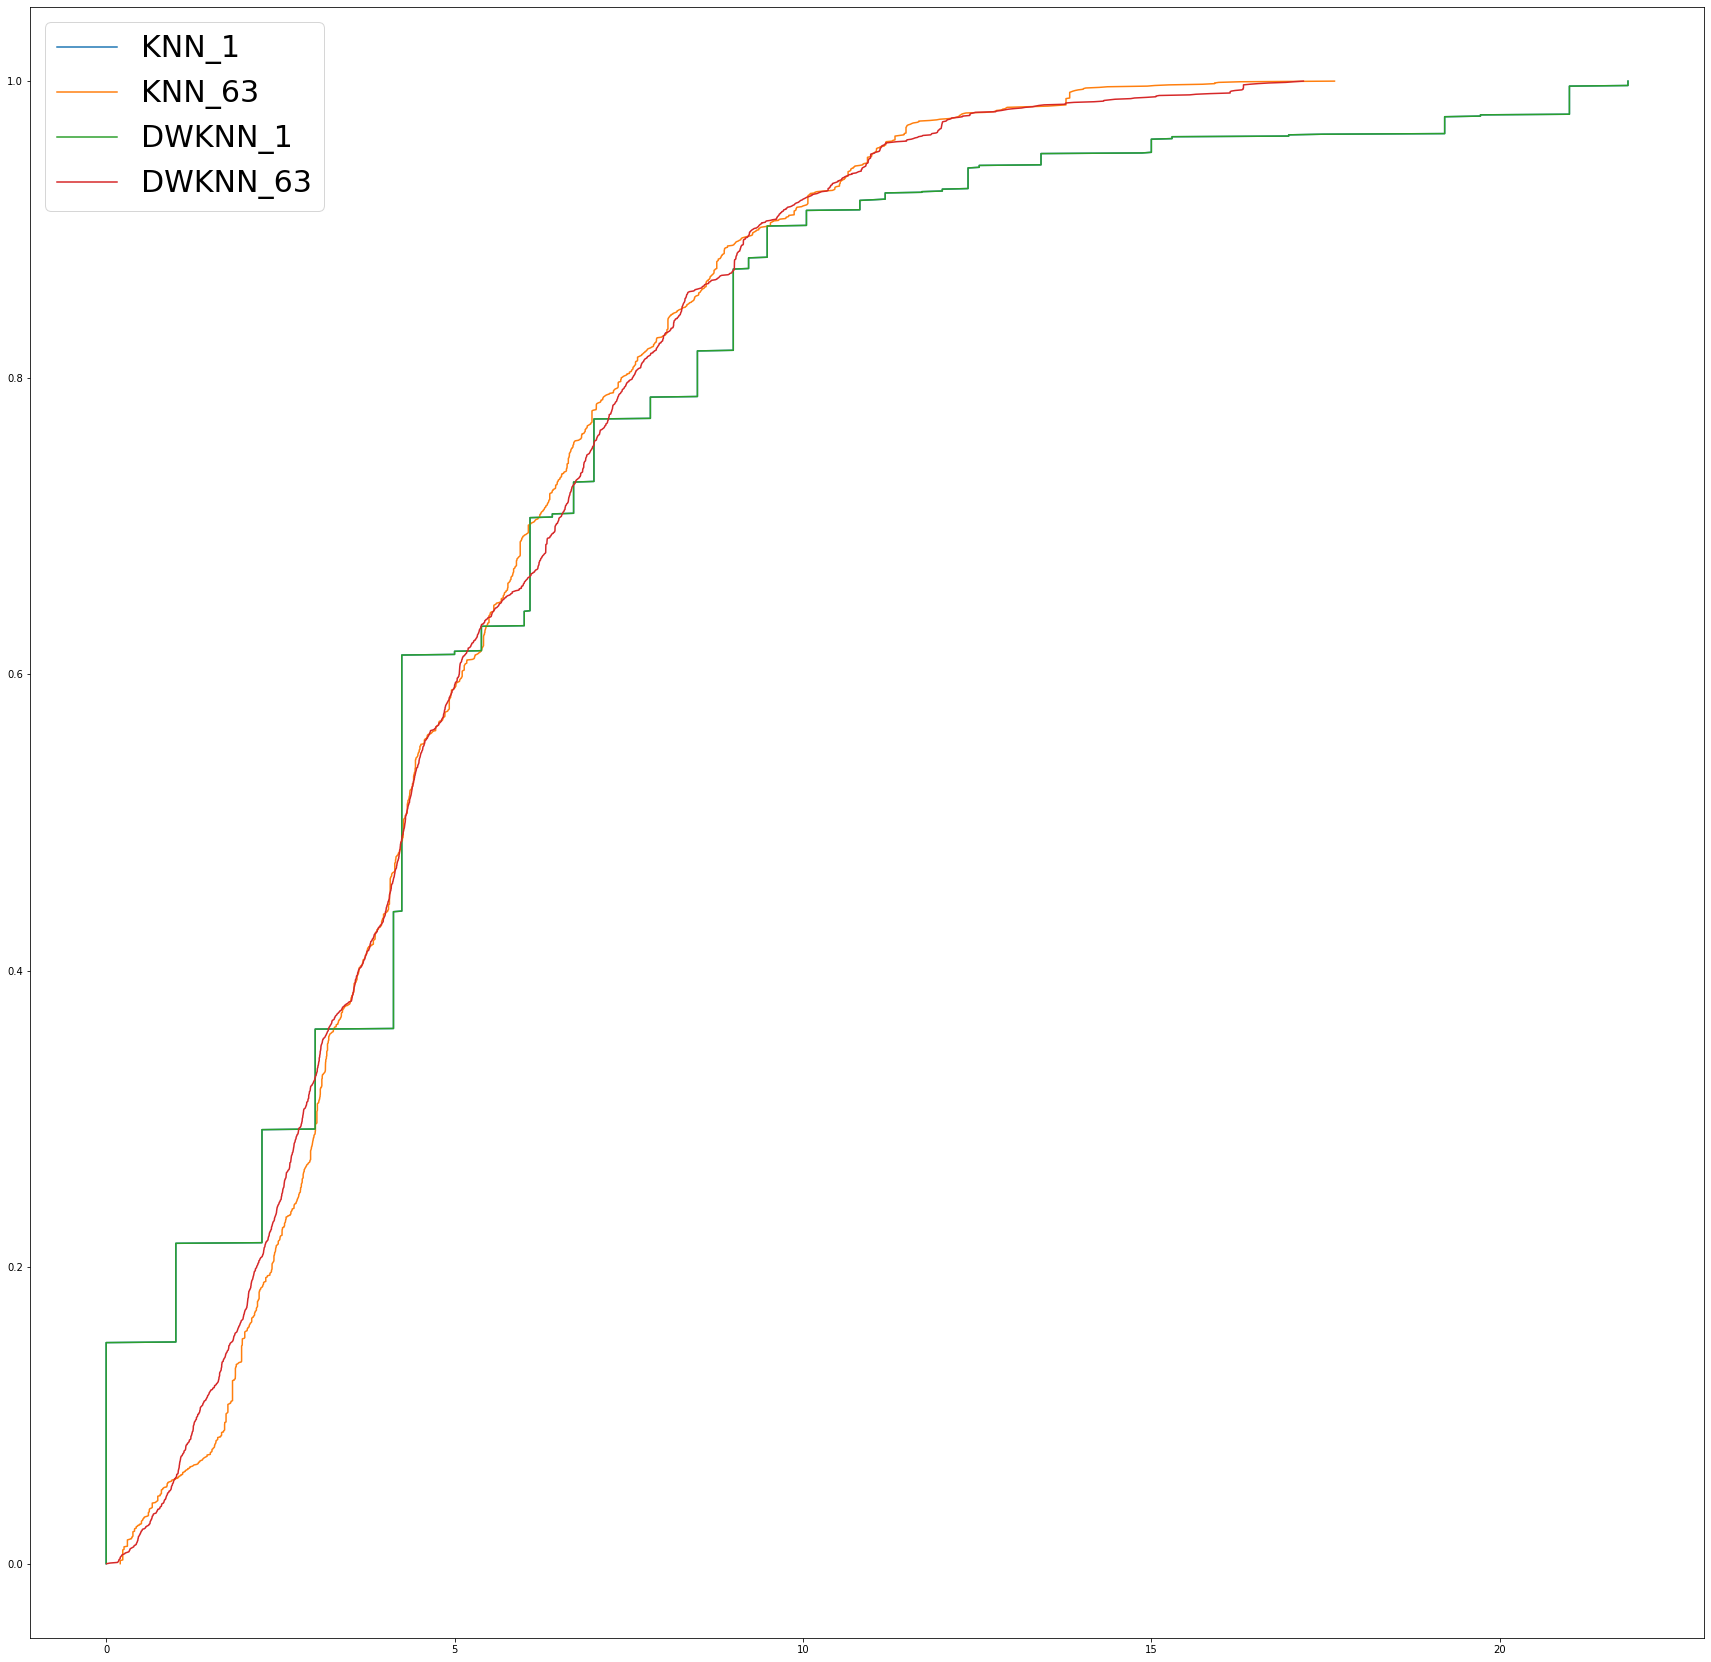

In [30]:
kvalList = [1 , 15, 31, 63]
KNN_kcomp1File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[0])+'.csv')
KNN_kcomp2File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[1])+'.csv')
KNN_kcomp3File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[2])+'.csv')
KNN_kcomp4File = ('E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(kvalList[3])+'.csv')

DWKNN_kcomp1File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[0])+'.csv')
DWKNN_kcomp2File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[1])+'.csv')
DWKNN_kcomp3File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[2])+'.csv')
DWKNN_kcomp4File = ('E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(kvalList[3])+'.csv')

print("Plotting from...")
print(KNN_kcomp1File, KNN_kcomp2File, KNN_kcomp3File, KNN_kcomp4File)
print(DWKNN_kcomp1File, DWKNN_kcomp2File, DWKNN_kcomp3File, DWKNN_kcomp4File)


fig= plt.figure(figsize=(30,30))
errorDf = pd.DataFrame(index = range(0,len(X_test)))

KNN_kcomp1 = pd.read_csv(KNN_kcomp1File)
error = KNN_kcomp1['error']
errorDf["knn_k"+str(kvalList[0])+"_error"] = error
knn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp1_error),step=1)/(len(knn_kcomp1_error)-1)
## plotting    
plt.plot(knn_kcomp1_error,cdf, label = "KNN_1")


KNN_kcomp4 = pd.read_csv(KNN_kcomp4File)
error = KNN_kcomp4['error']
errorDf["knn_k"+str(kvalList[3])+"_error"] = error
knn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp4_error),step=1)/(len(knn_kcomp4_error)-1)
## plotting    
plt.plot(knn_kcomp4_error,cdf, label = "KNN_63")

#-------------

DWKNN_kcomp1 = pd.read_csv(DWKNN_kcomp1File)
error = DWKNN_kcomp1['error']
errorDf["dwknn_k"+str(kvalList[3])+"_error"] = error
dwknn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp1_error),step=1)/(len(dwknn_kcomp1_error)-1)
## plotting    
plt.plot(dwknn_kcomp1_error,cdf, label = "DWKNN_1")


DWKNN_kcomp4 = pd.read_csv(DWKNN_kcomp4File)
error = DWKNN_kcomp4['error']
errorDf["dwknn_k"+str(kvalList[3])+"_error"] = error
dwknn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp4_error),step=1)/(len(dwknn_kcomp4_error)-1)
## plotting    
plt.plot(dwknn_kcomp4_error,cdf, label = "DWKNN_63")


# additional plot params
plt.legend(loc='best', fontsize = 30)
plt.show()


Plotting from...
E9_KNN_T1_k1.csv E9_KNN_T1_k15.csv E9_KNN_T1_k31.csv E9_KNN_T1_k63.csv
E9_DWKNN_T1_k1.csv E9_DWKNN_T1_k15.csv E9_DWKNN_T1_k31.csv E9_DWKNN_T1_k63.csv


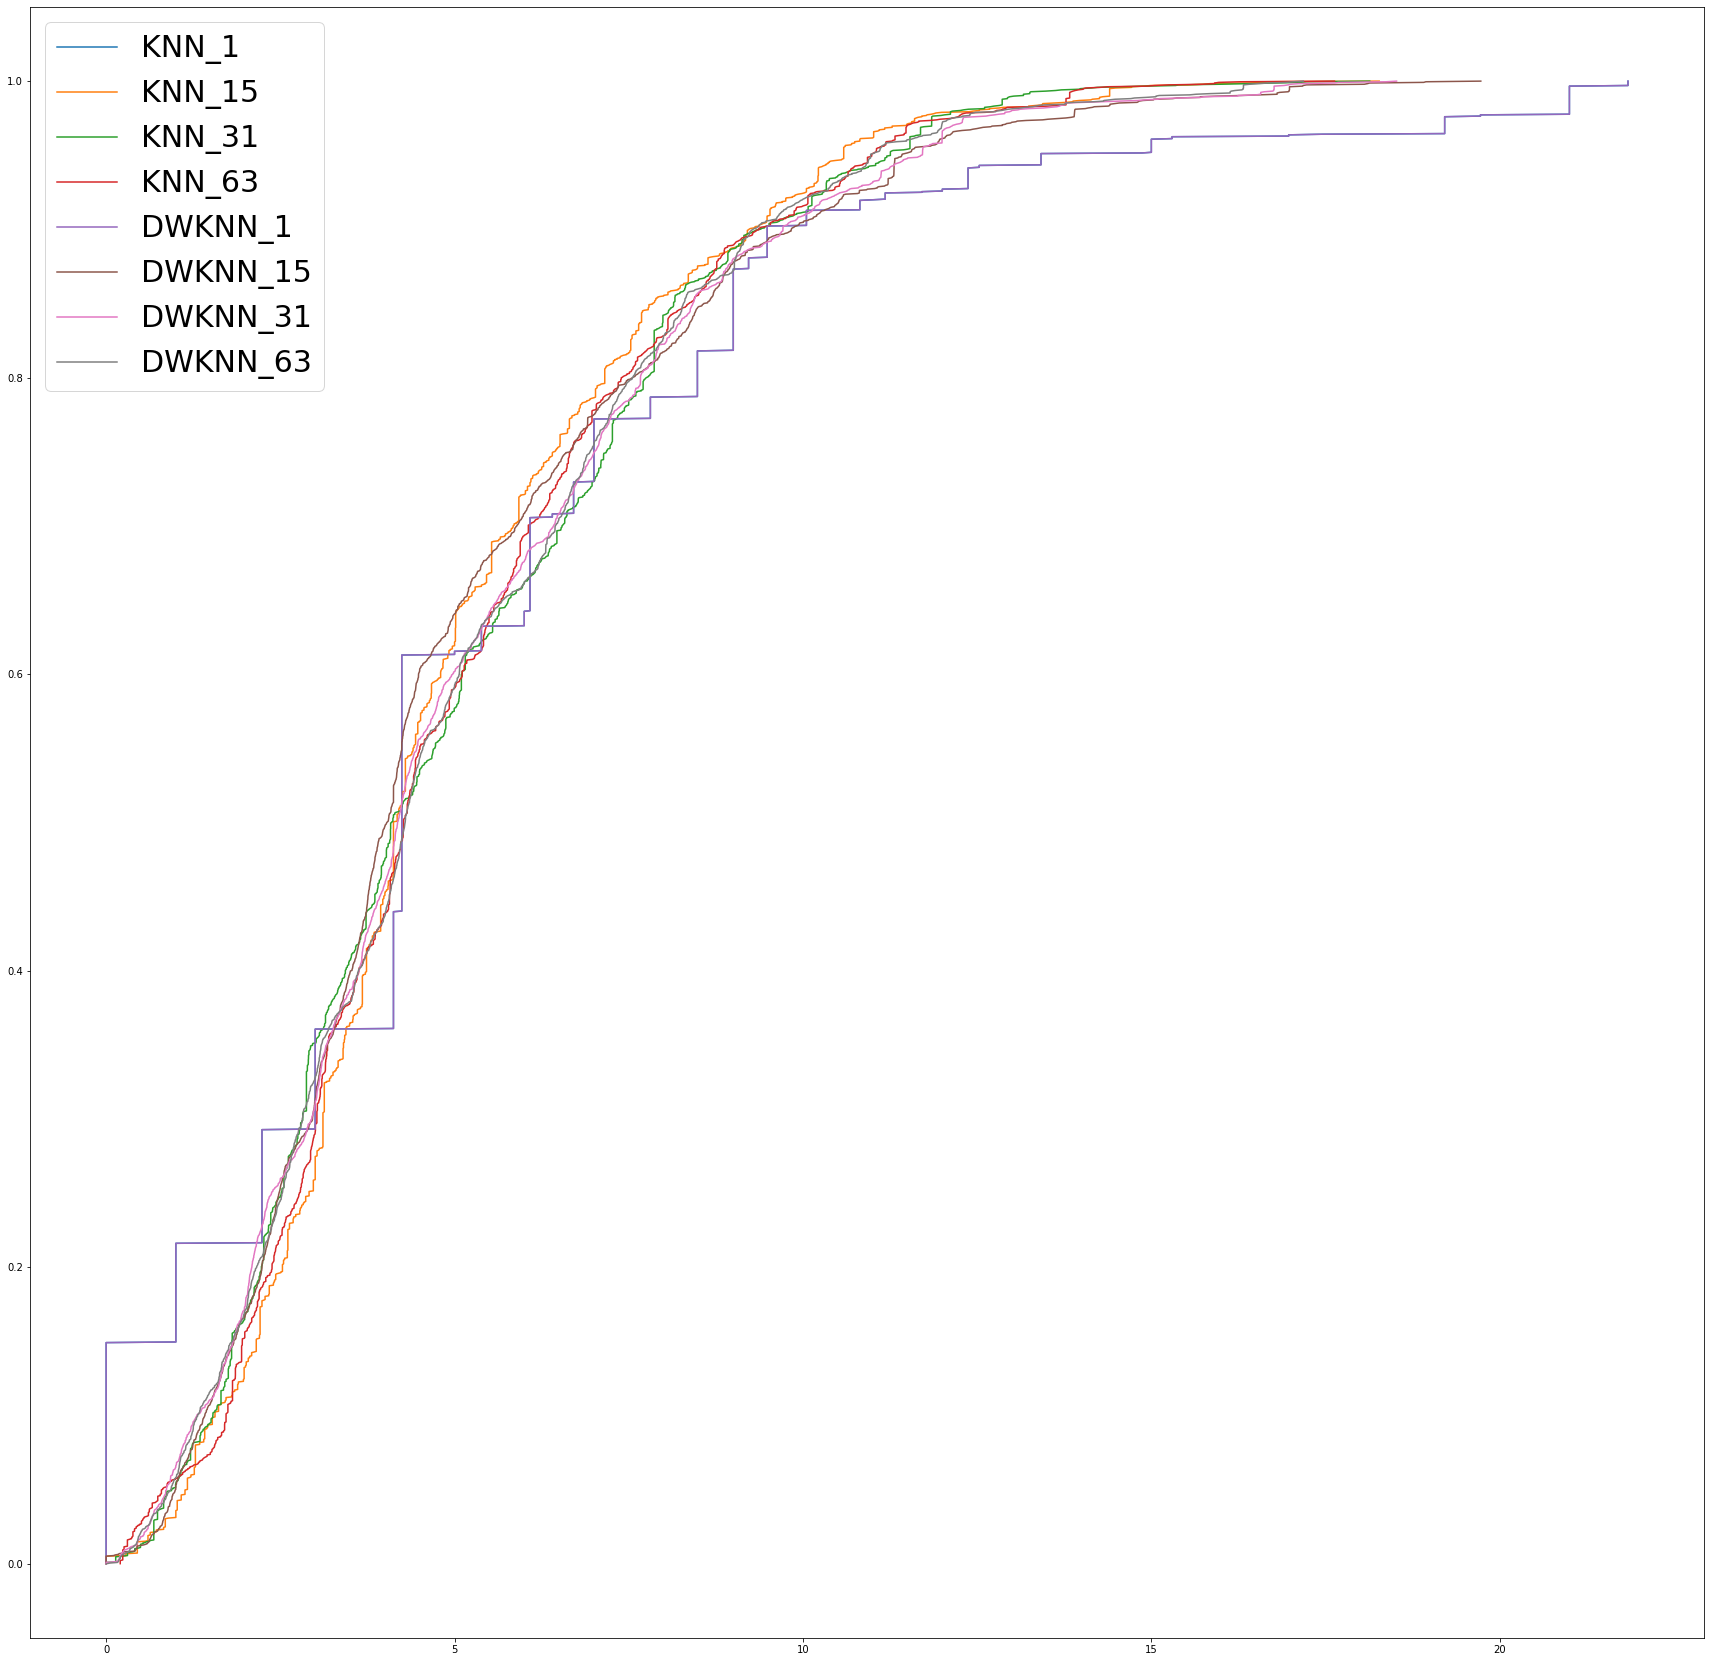

In [31]:
print("Plotting from...")
print(KNN_kcomp1File, KNN_kcomp2File, KNN_kcomp3File, KNN_kcomp4File)
print(DWKNN_kcomp1File, DWKNN_kcomp2File, DWKNN_kcomp3File, DWKNN_kcomp4File)

fig= plt.figure(figsize=(30,30))
errorDf = pd.DataFrame(index = range(0,len(X_test)))

KNN_kcomp1 = pd.read_csv(KNN_kcomp1File)
error = KNN_kcomp1['error']
errorDf["knn_k"+str(kvalList[0])+"_error"] = error
knn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp1_error),step=1)/(len(knn_kcomp1_error)-1)
## plotting    
plt.plot(knn_kcomp1_error,cdf, label = "KNN_1")

KNN_kcomp2 = pd.read_csv(KNN_kcomp2File)
error = KNN_kcomp2['error']
errorDf["knn_k"+str(kvalList[1])+"_error"] = error
knn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp2_error),step=1)/(len(knn_kcomp2_error)-1)
## plotting    
plt.plot(knn_kcomp2_error,cdf, label = "KNN_15")

KNN_kcomp3 = pd.read_csv(KNN_kcomp3File)
error = KNN_kcomp3['error']
errorDf["knn_k"+str(kvalList[2])+"_error"] = error
knn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp3_error),step=1)/(len(knn_kcomp3_error)-1)
## plotting    
plt.plot(knn_kcomp3_error,cdf, label = "KNN_31")

KNN_kcomp4 = pd.read_csv(KNN_kcomp4File)
error = KNN_kcomp4['error']
errorDf["knn_k"+str(kvalList[3])+"_error"] = error
knn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp4_error),step=1)/(len(knn_kcomp4_error)-1)
## plotting    
plt.plot(knn_kcomp4_error,cdf, label = "KNN_63")

#-------------

DWKNN_kcomp1 = pd.read_csv(DWKNN_kcomp1File)
error = DWKNN_kcomp1['error']
errorDf["dwknn_k"+str(kvalList[0])+"_error"] = error
dwknn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp1_error),step=1)/(len(dwknn_kcomp1_error)-1)
## plotting    
plt.plot(dwknn_kcomp1_error,cdf, label = "DWKNN_1")

DWKNN_kcomp2 = pd.read_csv(DWKNN_kcomp2File)
error = DWKNN_kcomp2['error']
errorDf["dwknn_k"+str(kvalList[1])+"_error"] = error
dwknn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp2_error),step=1)/(len(dwknn_kcomp2_error)-1)
## plotting    
plt.plot(dwknn_kcomp2_error,cdf, label = "DWKNN_15")

DWKNN_kcomp3 = pd.read_csv(DWKNN_kcomp3File)
error = DWKNN_kcomp3['error']
errorDf["dwknn_k"+str(kvalList[2])+"_error"] = error
dwknn_kcomp3_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp3_error),step=1)/(len(dwknn_kcomp3_error)-1)
## plotting    
plt.plot(dwknn_kcomp3_error,cdf, label = "DWKNN_31")

DWKNN_kcomp4 = pd.read_csv(DWKNN_kcomp4File)
error = DWKNN_kcomp4['error']
errorDf["dwknn_k"+str(kvalList[3])+"_error"] = error
dwknn_kcomp4_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp4_error),step=1)/(len(dwknn_kcomp4_error)-1)
## plotting    
plt.plot(dwknn_kcomp4_error,cdf, label = "DWKNN_63")


# additional plot params
plt.legend(loc='best', fontsize = 30)
plt.show()


Median Error:
knn_k1_error       4.242641
knn_k15_error      4.123106
knn_k31_error      4.098298
knn_k63_error      4.267953
dwknn_k1_error     4.242641
dwknn_k15_error    4.028432
dwknn_k31_error    4.181643
dwknn_k63_error    4.291216
dtype: float64

0.75 Quantile ERROR:
knn_k1_error       7.000000
knn_k15_error      6.426492
knn_k31_error      7.178923
knn_k63_error      6.663263
dwknn_k1_error     7.000000
dwknn_k15_error    6.651653
dwknn_k31_error    7.010228
dwknn_k63_error    6.946354
Name: 0.75, dtype: float64

Max Error:
knn_k1_error       21.840330
knn_k15_error      18.270194
knn_k31_error      18.133997
knn_k63_error      17.628376
dwknn_k1_error     21.840330
dwknn_k15_error    19.727977
dwknn_k31_error    18.519304
dwknn_k63_error    17.181752
dtype: float64


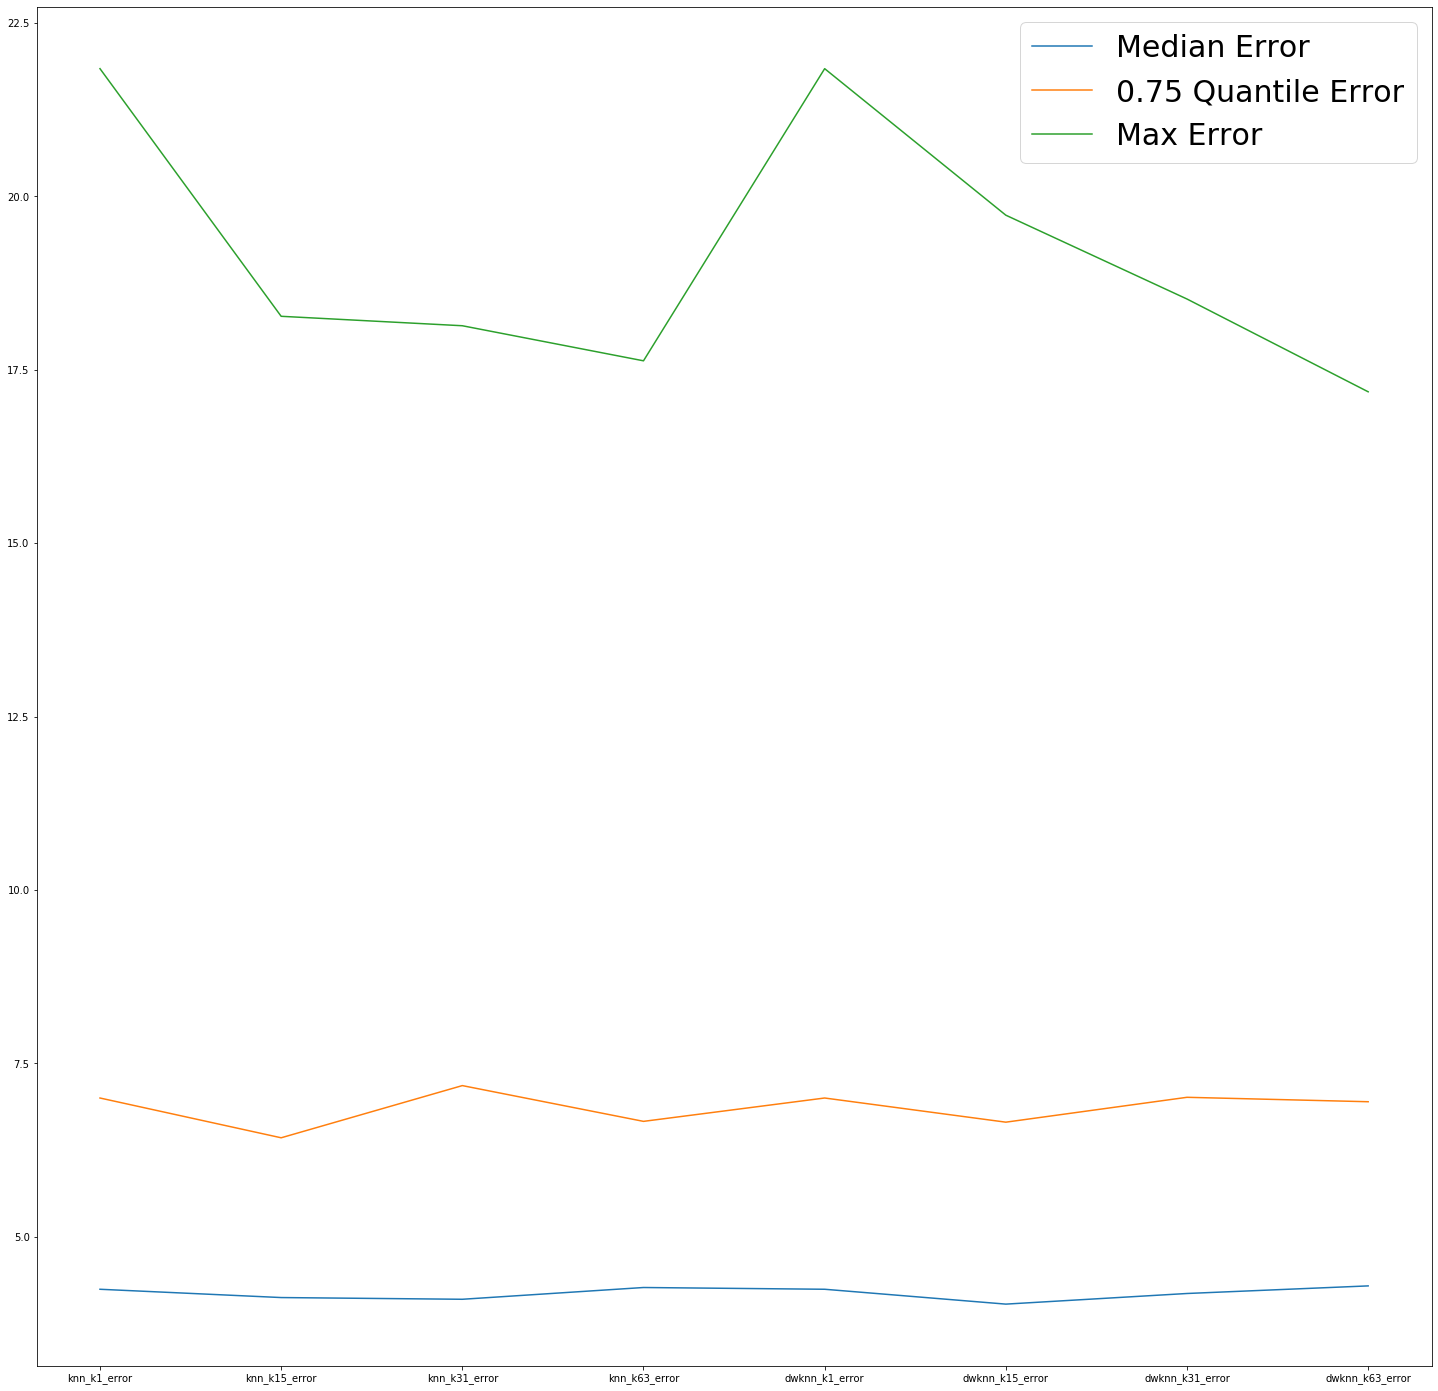

In [32]:
plt.figure(figsize = (25,25))
print("Median Error:")
print(errorDf.median())
plt.plot(errorDf.median(), label = "Median Error")
print("\n0.75 Quantile ERROR:")
print(errorDf.quantile(0.75))
plt.plot(errorDf.quantile(0.75), label = "0.75 Quantile Error")

print("\nMax Error:")
print(errorDf.max())
plt.plot(errorDf.max(), label = "Max Error")

plt.legend(loc = 'best', fontsize = 30)
plt.show()

In [33]:
# Create Error File
writeErrSumm = True
fileNameErrSumm = ('E'+str(exp)+'_ErrSummary_T'+str(trial)+'.csv')
meanErrArr = []
medianErrArr = []
quantErrArr = []
maxErrArr = []
for series in errorDf:
    meanErrArr.append(errorDf[series].mean())
    medianErrArr.append(errorDf[series].median())
    quantErrArr.append(errorDf[series].quantile(0.75))
    maxErrArr.append(errorDf[series].max())
    
errorSummary = pd.DataFrame(index=range(0,len(errorDf.columns)))
errorSummary.insert(loc=0, column="Mean Error", value=meanErrArr)
errorSummary.insert(loc=1, column="Median Error", value=medianErrArr)
errorSummary.insert(loc=2, column="0.75 Quantile Error", value=quantErrArr)
errorSummary.insert(loc=3, column="Max Error", value=maxErrArr)
algoType = ["knn_k"+str(kvalList[0]), "knn_k"+str(kvalList[1]), "knn_k"+str(kvalList[2]), "knn_k"+str(kvalList[3]),
                "dwknn_k"+str(kvalList[0]), "dwknn_k"+str(kvalList[1]), "dwknn_k"+str(kvalList[2]), "dwknn_k"+str(kvalList[3])]

errorSummary.insert(loc=0, column="Algorithm", value = algoType)
print(errorSummary)


if (writeErrSumm == True):
    errorSummary.to_csv(fileNameErrSumm, index=False)
    print("File "+fileNameErrSumm+" has been written.")
# print(medianErrArr)

   Algorithm  Mean Error  Median Error  0.75 Quantile Error  Max Error
0     knn_k1    5.159883      4.242641             7.000000  21.840330
1    knn_k15    4.866375      4.123106             6.426492  18.270194
2    knn_k31    4.954744      4.098298             7.178923  18.133997
3    knn_k63    4.966033      4.267953             6.663263  17.628376
4   dwknn_k1    5.159883      4.242641             7.000000  21.840330
5  dwknn_k15    4.920277      4.028432             6.651653  19.727977
6  dwknn_k31    4.996104      4.181643             7.010228  18.519304
7  dwknn_k63    4.972291      4.291216             6.946354  17.181752
File E9_ErrSummary_T1.csv has been written.
